In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,roc_auc_score,roc_curve, classification_report, confusion_matrix)
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('titanic.csv')
X = df[['Pclass','Sex','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']].copy()
y = df['Survived']

X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


<Axes: >

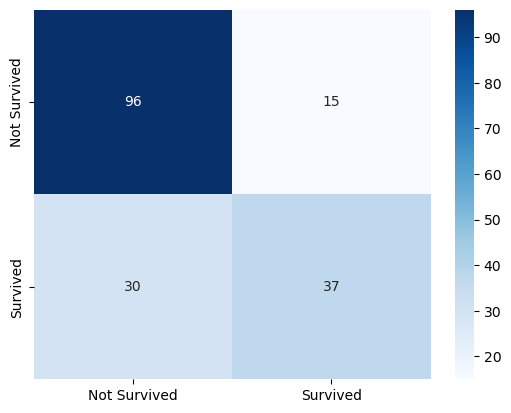

In [7]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])

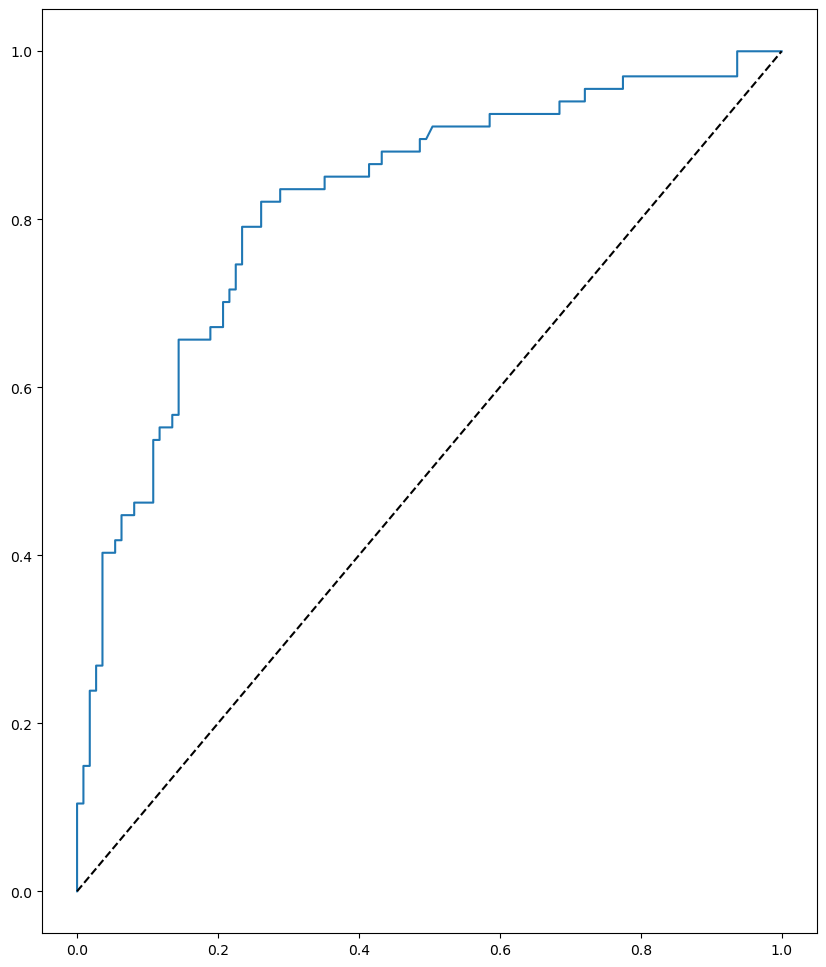

In [10]:
plt.figure(figsize=(10,12))
fpr, tpr, _ = roc_curve(y_test,y_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')